In [2]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
import matplotlib  as mpl
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
mpl.rc('font', **font)
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx


def NSE(s,o):
    """
    Created on Thu Jan 20 15:36:37 2011
    @ author:                  Sat Kumar Tomer
    @ author's webpage:        http://civil.iisc.ernet.in/~satkumar/
    @ author's email id:       satkumartomer@gmail.com
    @ author's website:        www.ambhas.com

    Nash Sutcliffe efficiency coefficient
    input:
        s: simulated [time]
        o: observed [time]
    output:
        ns: Nash Sutcliffe efficient coefficient
    """
    s,o = filter_nan(s,o)
    return 1 - sum((s-o)**2)/sum((o-np.mean(o))**2)

def filter_nan(s,o):
    """
    Created on Thu Jan 20 15:36:37 2011
    @ author:                  Sat Kumar Tomer
    @ author's webpage:        http://civil.iisc.ernet.in/~satkumar/
    @ author's email id:       satkumartomer@gmail.com
    @ author's website:        www.ambhas.com

    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan

    this is used by all other functions, otherwise they will produce nan as
    output
    """
    data = np.array([s.flatten(),o.flatten()])
    data = np.transpose(data)
    data = data[~np.isnan(data).any(1)]
    return data[:,0],data[:,1]



/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# read the netcdf files and merge them into one netcdf

file_names = glob.glob('/Users/shg096/Downloads/GRDC_discharge_Data/*.nc')

print(file_names)

datasets = [xr.open_dataset(file_name) for file_name in file_names]

merged_dataset = xr.merge(datasets)

merged_dataset['area'][:] = merged_dataset['area'][:] * 1000000 # m2 km2

['/Users/shg096/Downloads/GRDC_discharge_Data/2023-04-28_14-33.nc', '/Users/shg096/Downloads/GRDC_discharge_Data/2023-04-28_14-42.nc', '/Users/shg096/Downloads/GRDC_discharge_Data/2023-04-28_14-47.nc']


In [3]:
ds = xr.open_dataset('/Users/shg096/Desktop/mizuRoute_HDMA_Global/code/output/WM_1988.nc')
print(ds)

<xarray.Dataset>
Dimensions:     (time: 366, ID: 298277)
Coordinates:
  * time        (time) datetime64[ns] 1988-01-01 1988-01-02 ... 1988-12-31
  * ID          (ID) float64 1e+06 1e+06 1e+06 ... 8.427e+06 8.427e+06 8.428e+06
Data variables:
    target_vol  (time, ID) float64 ...
    abs_inj     (time, ID) float64 ...


<xarray.Dataset>
Dimensions:          (time: 365, hru: 298277, seg: 298277)
Coordinates:
  * time             (time) object 1996-01-01 00:00:00 ... 1996-12-31 00:00:00
Dimensions without coordinates: hru, seg
Data variables:
    basinID          (hru) int32 ...
    reachID          (seg) int32 ...
    basRunoff        (time, hru) float32 ...
    IRFroutedRunoff  (time, seg) float32 ...
    volume           (time, seg) float32 ...


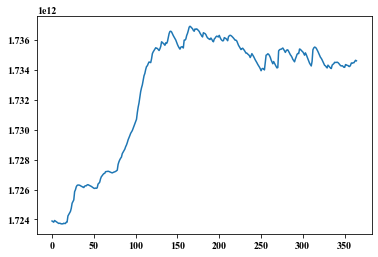

In [14]:
ds = xr.open_dataset('/Users/shg096/Downloads/HDMA_CLM_lake.h.1996-01-01-00000.nc')
print(ds)

ID = ds['reachID'][:]
idx = np.where(ID== 7000007) # is the lake ontario
idx = idx[0]
idx = idx.item()
idx
plt.plot(np.array(ds['volume'][:,idx]))


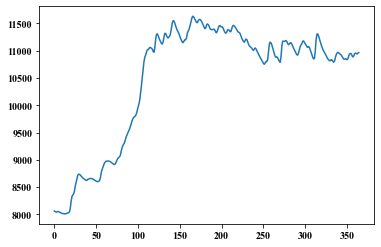

In [15]:
ID = ds['reachID'][:]
idx = np.where(ID== 3045137) # is the segment that outflow from lake ontario
idx = idx[0]
idx = idx.item()
idx
plt.plot(np.array(ds['IRFroutedRunoff'][:,idx]))

In [16]:
input_cat = '/Users/shg096/Desktop/MERIT_Hydro/cat/cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'

# load the files and calculating the downstream of each segment
cat  = gpd.read_file(input_cat)
cat

,COMID,unitarea,geometry
0,71000092,26.791342,"POLYGON ((-102.34292 59.01875, -102.33958 59.0..."
1,71007360,104.730245,"POLYGON ((-100.10875 57.05625, -100.10458 57.0..."
2,71011339,39.055418,"POLYGON ((-98.47625 56.06708, -98.47542 56.067..."
3,71022453,54.029718,"MULTIPOLYGON (((-106.43792 51.97125, -106.4370..."
4,71028389,40.749747,"POLYGON ((-104.60042 51.00625, -104.59792 51.0..."
...,...,...,...
48946,71048311,45.853011,"POLYGON ((-96.76792 46.91292, -96.76625 46.912..."
48947,71048310,40.198677,"POLYGON ((-96.79458 46.96958, -96.79375 46.969..."
48948,71048309,3.724611,"POLYGON ((-96.82375 46.98792, -96.82208 46.987..."
48949,71048308,0.088097,"POLYGON ((-96.82542 46.98875, -96.82375 46.988..."


In [18]:
cat.total_bounds

array([-117.42041667,   45.46958333,  -78.54208333,   60.22541667])

In [10]:
ds = xr.open_dataset('/Users/shg096/Downloads/MESH-vector-simple-example-main/Model_Workflow/vector_based_workflow/6_model_runs/MESH_drainage_database.nc')
ds

<xarray.Dataset>
Dimensions:     (subbasin: 7, GRU: 14)
Coordinates:
    lon         (subbasin) float64 ...
    lat         (subbasin) float64 ...
    time        (subbasin) datetime64[ns] ...
Dimensions without coordinates: subbasin, GRU
Data variables: (12/15)
    seg_id      (subbasin) int64 ...
    tosegment   (subbasin) int64 ...
    ChnlSlope   (subbasin) float64 ...
    ChnlLength  (subbasin) float64 ...
    hruid       (subbasin) int64 ...
    seg_hr_id   (subbasin) int64 ...
    ...          ...
    IAK         (subbasin) int64 ...
    Rank        (subbasin) float64 ...
    Next        (subbasin) float64 ...
    crs         int32 ...
    gru         (subbasin, GRU) float64 ...
    LandUse     (GRU) object ...
Attributes:
    Author:       Created by MESH vector-based workflow scripts
    History:      Created 2023/06/20 16:48:22
    Purpose:      Create a river network .nc file for WATROUTE routing
    featureType:  point

In [11]:
ds = xr.open_dataset('/Users/shg096/Downloads/ESPO-G6-R2v1.0_day_ESPO-G6-R2_v1.0.0_CMIP6_ScenarioMIP_NAM_NUIST_NESM3_ssp245_r1i1p1f1_19500101-21001231.nc')
ds

<xarray.Dataset>
Dimensions:       (time: 365, rlat: 800, rlon: 1)
Coordinates:
  * time          (time) object 1950-01-01 00:00:00 ... 1950-12-31 00:00:00
  * rlat          (rlat) float32 -46.17 -46.08 -45.99 ... 25.56 25.65 25.74
  * rlon          (rlon) float32 324.6
Data variables:
    pr            (time, rlat, rlon) float32 ...
    rotated_pole  float32 ...
    tasmax        (time, rlat, rlon) float32 ...
    tasmin        (time, rlat, rlon) float32 ...
Attributes: (12/79)
    Conventions:                     CF-1.7 CMIP-6.2
    Notes:                           Regridded on the grid of RDRS v2.1, then...
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           109573.0
    ...                              ...
    source_institution:              NUIST
    History:                         Translated to CF-1.0 Conventions by Netc...
    geospatial_lat_min:              5.7015126732408445
    geospatial_lat_max:              58.583306780997646
    geospatial_lon_min:              -116.18425137399433
    geospatial_lon_max:              179.43048981936877

In [ ]:
import multiprocessing

def process_nc(nc_name):
    try:
        print("Processing", nc_name)
        # your existing code within the for loop
    except Exception as e:
        print("Error occurred:", e)

if __name__ == '__main__':
    # Create a multiprocessing.Pool with the desired number of processes
    num_processes = multiprocessing.cpu_count()  # Use the number of available CPU cores
    pool = multiprocessing.Pool(processes=2)

    # Example nc_names list
    nc_names = ['file1.nc', 'file2.nc', 'file3.nc', 'file4.nc']

    # Use pool.map() to parallelize the for loop
    pool.map(process_nc, nc_names)

    # Close the pool to free up resources
    pool.close()
    pool.join()



Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'process_nc' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/multiprocessing/process.py", line 108, in

In [18]:
from easymore.easymore import easymore
# initialise easymore and read configuration from the file
esmr = easymore() # initial the easymore
esmr.read_config_dict('/Users/shg096/Desktop/EASYMORE/examples/parallel/config.txt') # read the configuration file
esmr.only_create_remap_csv = True # only crate the remapping file
esmr.nc_remapper() # create remap file


EASYMORE version 1.1.0 is initiated.


JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)

In [19]:
esmr.case_name

'case_temp'

In [21]:
import json

with open('/Users/shg096/Desktop/EASYMORE/examples/parallel/config.txt') as f:
    data = json.load(f)

print(data)

how to remove '' from a dictionary key?

{'case_name': 'ERA5_capitals_north_america', 'temp_dir': './../temporary/', 'target_shp': './../data/target_shapefiles/Capitals_point.shp', 'source_nc': './../data/Source_nc_ERA5/ERA5_NA_*.nc', 'var_names': ['airtemp'], 'var_lon': 'longitude', 'var_lat': 'latitude', 'var_time': 'time', 'output_dir': './../output/'}


In [22]:
original_dict = data

new_dict = {}
for key, value in original_dict.items():
    new_key = key.replace("'", "")
    new_dict[new_key] = value

print(new_dict)

{'case_name': 'ERA5_capitals_north_america', 'temp_dir': './../temporary/', 'target_shp': './../data/target_shapefiles/Capitals_point.shp', 'source_nc': './../data/Source_nc_ERA5/ERA5_NA_*.nc', 'var_names': ['airtemp'], 'var_lon': 'longitude', 'var_lat': 'latitude', 'var_time': 'time', 'output_dir': './../output/'}


In [24]:
import json
d = {"one":1, "two":2}
json.dump(d, open("/Users/shg096/Desktop/text.txt",'w'))


NameError: name 'one' is not defined

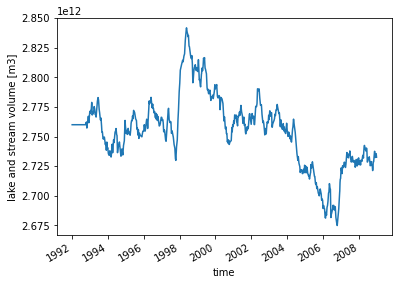

In [90]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

file_pattern = '/Users/shg096/Downloads/HDMA_ERA5_lake_victoria.h.*.nc'

result = []

for file in sorted(glob.glob(file_pattern)):
    ds = xr.open_dataset(file)
    ID = ds['reachID'][:]
    idx = np.where(ID == 7000016)  # Assuming this is the lake victoria, 2062605
    idx = idx[0]
    idx = idx.item()
    result.append(ds['volume'][:, idx])
    ds.close()

result_combined = xr.concat(result, dim='time')
result_combined.plot()
plt.show()

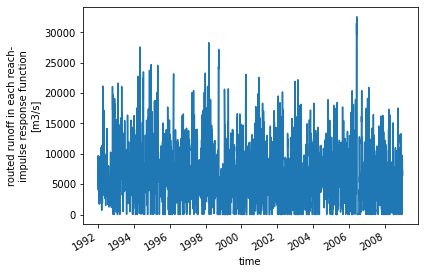

In [91]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

file_pattern = '/Users/shg096/Downloads/HDMA_ERA5_lake_victoria.h.*.nc'

result = []

for file in sorted(glob.glob(file_pattern)):
    ds = xr.open_dataset(file)
    ID = ds['reachID'][:]
    idx = np.where(ID == 2062605)  # Assuming this is the lake victoria, 2062605
    idx = idx[0]
    idx = idx.item()
    result.append(ds['IRFroutedRunoff'][:, idx])
    ds.close()

result_combined = xr.concat(result, dim='time')
result_combined.plot()
plt.show()

<AxesSubplot:xlabel='time'>

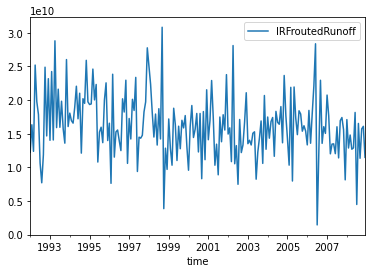

In [92]:
result_combined = result_combined.to_dataframe()
result_combined
result_combined_monthly = result_combined.resample('M').mean()
result_combined_monthly['IRFroutedRunoff'] = result_combined_monthly['IRFroutedRunoff']*3600*24*30
result_combined_monthly.plot()

1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008


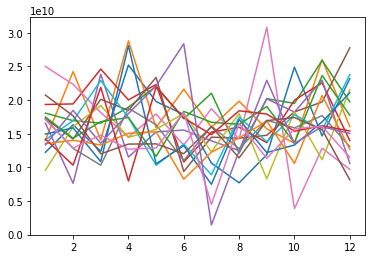

In [93]:
result_combined_monthly['month'] = result_combined_monthly.index.month
result_combined_monthly['year'] = result_combined_monthly.index.year

for year in np.unique(result_combined_monthly['year']):
    print(year)
    result_combined_monthly_slice = result_combined_monthly[result_combined_monthly['year']==year]
    plt.plot(result_combined_monthly_slice['month'],\
             result_combined_monthly_slice['IRFroutedRunoff'])



<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 21)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 35.5 35.75 36.0
  * latitude   (latitude) float32 1.0 0.75 0.5 0.25 ... -3.25 -3.5 -3.75 -4.0
Data variables:
    ro         (latitude, longitude) float32 0.03166 0.008296 ... 0.00113
    tp         (latitude, longitude) float32 0.1399 0.1282 ... 0.02913 0.03038
    pev        (latitude, longitude) float32 0.1269 0.1346 ... 0.1894 0.2006


<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1978-10-01 1978-10-02 ... 1978-10-31
Data variables:
    ro         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    pev        (time, latitude, longitude) float32 2.445e-08 ... 2.883e-05

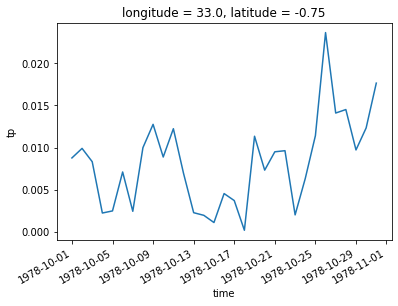

In [142]:
ds = xr.open_dataset('/Users/shg096/Downloads/forcing_1978_10.ncagg_daily')

latitude_min = -4
latitude_max = 1
longitude_min = 30
longitude_max = 36

ds['pev'] = ds['pev'].where(ds['pev'] >= 0, 0)

# Slice the Dataset based on latitude and longitude
ds_sliced = ds.sel(latitude=slice(latitude_max, latitude_min), longitude=slice(longitude_min, longitude_max))

sum_values = ds_sliced.sum(dim='time')
print(sum_values)
#sum_values['pev'][:,:].plot()


ds_s2 = sum_values.sel(latitude=-1, longitude=33, method='nearest')
ds_s2


ds_slice = ds.sel(latitude=-0.75, longitude=33, method='nearest')

ds_slice['tp'].plot()
ds

<xarray.Dataset>
Dimensions:  (lat: 600, lon: 1440, time: 365)
Coordinates:
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-12-31
Data variables:
    prec     (time, lat, lon) float32 ...
    evapw    (time, lat, lon) float32 ...
    runoff   (time, lat, lon) float32 ...
Attributes:
    history:                    Tue Jun  9 01:16:32 2020: ncks -A -v runoff r...
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...
    history_of_appended_files:  Tue Jun  9 01:16:32 2020: Appended file runof...

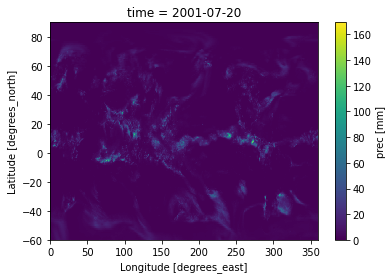

In [146]:
ds = xr.open_dataset('/Users/shg096/Downloads/mizuRoute_mswep_v1_2001.nc')
ds['prec'][200,:,:].plot()
ds

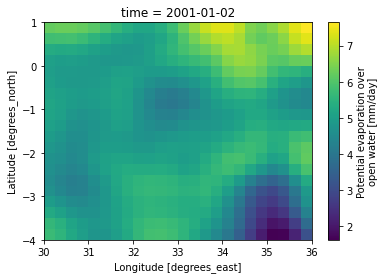

In [130]:
latitude_min = -4
latitude_max = 1
longitude_min = 30
longitude_max = 36

# Slice the Dataset based on latitude and longitude
ds_sliced = ds.sel(lat=slice(latitude_min, latitude_max), lon=slice(longitude_min, longitude_max))

ds_sliced['evapw'][1,:,:].plot()

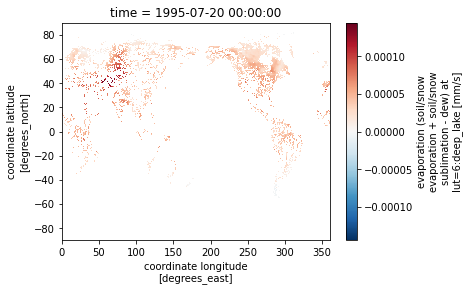

In [145]:
ds = xr.open_dataset('/Users/shg096/Downloads/clm50sp_release-clm5.0.20_0.5deg_GSWP3V1_LakeEvap_2000.clm2.1995-01-01-00000.nc')
ds
ds['EVAP'][200,:,:].plot()